In [1]:
import pandas as pd
from sqlalchemy import create_engine,inspect
from config import user, password, db_name
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from pprint import pprint
import plotly.express as px
from urllib.request import urlopen

In [2]:
# Create database connection
rds_connection_string = f"{user}:{password}@localhost:5432/{db_name}"
engine = create_engine(f"postgresql://{rds_connection_string}")

In [3]:
# Import CSV with constructors data
csv_file = "Resources/constructors.csv"
constructors_df = pd.read_csv(csv_file)
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [4]:
#transform constructors data
constructors_df = constructors_df.rename(columns={"constructorId": "constructor_id", "constructorRef": "constructor_ref"})
constructors_df.head()

,constructor_id,constructor_ref,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [5]:
#export constructors data
constructors_df.to_sql(name='constructors', con=engine, if_exists='append', index=False)

In [6]:
# Import CSV with drivers data
csv_file = "Resources/drivers.csv"
drivers_df = pd.read_csv(csv_file, parse_dates=["dob"])
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
#transform drivers data
drivers_df = drivers_df.rename(columns={
"driverRef": "driver_ref", 
"driverId": "driver_id",
"forename": "first_name",
"surname": "last_name"})
drivers_df.drop(['driver_ref', 'number', 'code'], axis=1,inplace=True)
drivers_df.head()

,driver_id,first_name,last_name,dob,nationality,url
0,1,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [8]:
#export drivers data
drivers_df.to_sql(name='drivers', con=engine, if_exists='append', index=False)

In [9]:
# Import CSV with circuits data
csv_file = "Resources/circuits.csv"
circuits_df = pd.read_csv(csv_file)
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [10]:
#transform circuits data
circuits_df = circuits_df.rename(columns={"circuitId": "circuit_id", "circuitRef": "circuit_ref", "name": "circuit_name"})
circuits_df["alt"]=circuits_df["alt"].replace("\\N", None)
circuits_df.head()

,circuit_id,circuit_ref,circuit_name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [11]:
#export circuit data
circuits_df.to_sql(name='circuits', con=engine, if_exists='append', index=False)

In [12]:
# Import CSV with status data
csv_file = "Resources/status.csv"
status_df = pd.read_csv(csv_file)
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [13]:
#transform status data
status_df = status_df.rename(columns={
"statusId": "status_id"})
status_df.head()

,status_id,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [14]:
#export status data
status_df.to_sql(name='status', con=engine, if_exists='append', index=False)

In [15]:
# Import CSV with races data
csv_file = "Resources/races.csv"
races_df = pd.read_csv(csv_file, parse_dates=["date"])

races_df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-05-04,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-10-05,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [16]:
#transform races data
races_df = races_df.rename(columns={"raceId": "race_id", "circuitId": "circuit_id"})
races_df["time"]=races_df["time"].replace("\\N", None)
races_df.head()

,race_id,year,round,circuit_id,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-05-04,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-10-05,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [17]:
#export racess data
races_df.to_sql(name='races', con=engine, if_exists='append', index=False)

In [18]:
# Import CSV with qualifying data
csv_file = "Resources/qualifying.csv"
qualifying_df = pd.read_csv(csv_file)
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [19]:
#transform qualifying data
qualifying_df = qualifying_df.rename(columns={
"raceId": "race_id", 
"driverId": "driver_id",
"constructorId": "constructor_id"})
qualifying_df.drop(['qualifyId', 'number'], axis=1,inplace=True)
qualifying_df["q1"]=qualifying_df["q1"].replace("\\N", None)
qualifying_df["q2"]=qualifying_df["q2"].replace("\\N", None)
qualifying_df["q3"]=qualifying_df["q3"].replace("\\N", None)
qualifying_df.head()


,race_id,driver_id,constructor_id,position,q1,q2,q3
0,18,1,1,1,1:26.572,1:25.187,1:26.714
1,18,9,2,2,1:26.103,1:25.315,1:26.869
2,18,5,1,3,1:25.664,1:25.452,1:27.079
3,18,13,6,4,1:25.994,1:25.691,1:27.178
4,18,2,2,5,1:25.960,1:25.518,1:27.236


In [20]:
#export qualifying data
qualifying_df.to_sql(name='qualifying', con=engine, if_exists='append', index=False)

In [21]:
# Import CSV with lap_times data
csv_file = "Resources/lap_times.csv"
lap_times_df = pd.read_csv(csv_file)
lap_times_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [22]:
#transform lap_times data
lap_times_df = lap_times_df.rename(columns={
"raceId": "race_id", 
"driverId": "driver_id",
"milliseconds": "time_milli"})
lap_times_df.drop(['time'], axis=1,inplace=True)
lap_times_df.head()

,race_id,driver_id,lap,position,time_milli
0,841,20,1,1,98109
1,841,20,2,1,93006
2,841,20,3,1,92713
3,841,20,4,1,92803
4,841,20,5,1,92342


In [23]:
#export lap_times data
lap_times_df.to_sql(name='lap_times', con=engine, if_exists='append', index=False)

In [24]:
# Import CSV with pit_stops data
csv_file = "Resources/pit_stops.csv"
pit_stops_df = pd.read_csv(csv_file)
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [25]:
#transform pit_stops data
pit_stops_df = pit_stops_df.rename(columns={
"raceId": "race_id", 
"driverId": "driver_id",
"stop": "stop_number",
"milliseconds": "duration_milli"})
pit_stops_df.drop(['duration'], axis=1,inplace=True)
pit_stops_df.head()

,race_id,driver_id,stop_number,lap,time,duration_milli
0,841,153,1,1,17:05:23,26898
1,841,30,1,1,17:05:52,25021
2,841,17,1,11,17:20:48,23426
3,841,4,1,12,17:22:34,23251
4,841,13,1,13,17:24:10,23842


In [26]:
#export pit_stops data
pit_stops_df.to_sql(name='pit_stops', con=engine, if_exists='append', index=False)

In [27]:
# Import CSV with results data
csv_file = "Resources/results.csv"
results_df = pd.read_csv(csv_file)
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [28]:
#transform results data
results_df.drop(['resultId', 'number', 'positionText', 'time', 'position'], axis=1,inplace=True)
results_df = results_df.rename(columns={"raceId": "race_id",
"driverId": "driver_id",
"constructorId": "constructor_id",
"positionOrder": "position",
"milliseconds": "time_milli",
"fastestLap": "fastest_lap",
"rank": "fastest_lap_rank",
"fastestLapTime": "fastest_lap_time",
"fastestLapSpeed": "fastest_lap_speed",
"statusId": "status_id"})
results_df["time_milli"]=results_df["time_milli"].replace("\\N", None)
results_df["fastest_lap"]=results_df["fastest_lap"].replace("\\N", None)
results_df["fastest_lap_rank"]=results_df["fastest_lap_rank"].replace("\\N", None)
results_df["fastest_lap_time"]=results_df["fastest_lap_time"].replace("\\N", None)
results_df["fastest_lap_speed"]=results_df["fastest_lap_speed"].replace("\\N", None)
results_df.head()

,race_id,driver_id,constructor_id,grid,position,points,laps,time_milli,fastest_lap,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,status_id
0,18,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,1
1,18,2,2,5,2,8.0,58,5696094,41,3,1:27.739,217.586,1
2,18,3,3,7,3,6.0,58,5698779,41,5,1:28.090,216.719,1
3,18,4,4,11,4,5.0,58,5707797,58,7,1:28.603,215.464,1
4,18,5,1,3,5,4.0,58,5708630,43,1,1:27.418,218.385,1


In [29]:
#export results data
results_df.to_sql(name='results', con=engine, if_exists='append', index=False)

In [33]:
#Run SQL query to find the number of races per circuit
races_per_circuit_df = pd.read_sql(
    "SELECT circuits.circuit_name, COUNT(races.circuit_id) \
        FROM races \
            INNER JOIN circuits ON races.circuit_id=circuits.circuit_id \
                GROUP BY races.circuit_id, circuits.circuit_name \
                    ORDER BY COUNT(races.circuit_id) ASC",
    engine
)
races_per_circuit_df

# Getting first 3 rows from df
top_15_circuits = races_per_circuit_df.iloc[len(races_per_circuit_df)-15:]
top_15_circuits.set_index('circuit_name', inplace=True)
top_15_circuits


,count
circuit_name,
A1-Ring,25
Albert Park Grand Prix Circuit,25
Autodromo Enzo e Dino Ferrari,30
Circuit Park Zandvoort,32
Circuit de Barcelona-Catalunya,32
Suzuka Circuit,32
Hockenheimring,37
Hungaroring,37
Autódromo José Carlos Pace,39


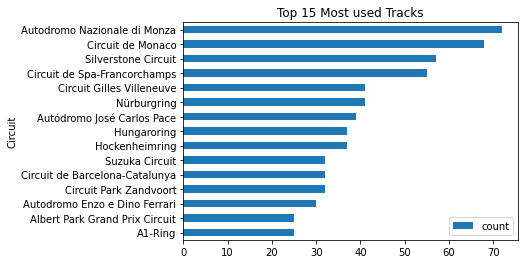

In [34]:
title = "Top 15 Most used Tracks"
ylabel = "Number of Races"
xlabel = "Circuit"


top_15_circuits.plot.barh(title = title, ylabel = ylabel, xlabel = xlabel);
#plt.xticks(rotation=45, ha='right');

savename = "Top 15 Most used Tracks.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Top 15 Most used Tracks.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [35]:
#Run SQL query to find the average lap time
avg_lap_time_df = pd.read_sql(
    "SELECT l.race_id, r.year, r.round, AVG(l.time_milli) AS avg_lap_time \
        FROM lap_times AS l \
            JOIN races AS r \
                ON r.race_id=l.race_id \
                    WHERE r.year=2009 \
                        GROUP BY (l.race_id, r.year, r.round) \
                            ORDER BY (l.race_id)",
    engine
)
avg_lap_time_df

,race_id,year,round,avg_lap_time
0,1,2009,1,97427.745274
1,2,2009,2,109763.157040
2,3,2009,3,128685.079179
3,4,2009,4,97834.824889
4,5,2009,5,89878.926752
5,6,2009,6,78432.498825
6,7,2009,7,90473.845872
7,8,2009,8,84317.458115
8,9,2009,9,97746.690539
9,10,2009,10,85345.854561


In [36]:
#Run SQL query to find the average fastest lap speed
avg_fastest_lap_df = pd.read_sql(
    "SELECT l.race_id, l.avg_fastest_lap, r.year, r.round, r.name \
        FROM lap_fastest_time_avg AS l \
            JOIN races AS r ON r.race_id=l.race_id \
                ORDER BY (r.year,r.round)",
    engine
)
avg_fastest_lap_df

,race_id,avg_fastest_lap,year,round,name
0,833,193.52200,1950,1,British Grand Prix
1,834,193.52200,1950,2,Monaco Grand Prix
2,835,193.52200,1950,3,Indianapolis 500
3,836,193.52200,1950,4,Swiss Grand Prix
4,837,193.52200,1950,5,Belgian Grand Prix
...,...,...,...,...,...
1055,1072,239.25890,2021,21,Saudi Arabian Grand Prix
1056,1073,215.67510,2021,22,Abu Dhabi Grand Prix
1057,1074,201.42245,2022,1,Bahrain Grand Prix
1058,1075,236.96815,2022,2,Saudi Arabian Grand Prix


In [37]:
#Run SQL query to find the average fastest lap speed
avg_fastest_lap_df = pd.read_sql(
    "SELECT * FROM pit_stop_duration",
    engine
)
avg_fastest_lap_df

,race_id,avg_pit_duration
0,841,24342.822222
1,842,24434.372881
2,843,22299.241379
3,844,23005.060976
4,845,21567.597403
...,...,...
215,1072,786495.680851
216,1073,21811.655172
217,1074,25377.603448
218,1075,21812.631579


In [38]:
#Run SQL query to find the average fastest lap speed
avg_fastest_lap_df = pd.read_sql(
    "SELECT p.race_id, p.avg_pit_duration, r.year, r.round \
        FROM pit_stop_duration AS p \
            JOIN races AS r ON r.race_id=p.race_id \
                WHERE year=2020\
                    ORDER BY (r.year,r.round)",
    engine
)
avg_fastest_lap_df

,race_id,avg_pit_duration,year,round
0,1031,21043.815789,2020,1
1,1032,22929.190476,2020,2
2,1033,23197.377778,2020,3
3,1034,31254.090909,2020,4
4,1035,28733.780488,2020,5
5,1036,22335.228571,2020,6
6,1037,24100.450000,2020,7
7,1038,714235.270270,2020,8
8,1039,529469.500000,2020,9
9,1040,30807.333333,2020,10


In [39]:
#Run SQL query to find the average fastest lap speed
avg_fastest_lap_df = pd.read_sql(
    "SELECT p.race_id, p.avg_pit_time, p.driver_id, d.first_name, d.last_name, r.year, r.round \
        FROM pit_stop_avg_per_driver AS p \
            JOIN races AS r ON r.race_id=p.race_id \
                JOIN drivers AS d ON p.driver_id=d.driver_id \
                    WHERE (year=2020 AND last_name='Bottas' AND first_name='Valtteri') \
                        ORDER BY (r.year,r.round)",
    engine
)
avg_fastest_lap_df

,race_id,avg_pit_time,driver_id,first_name,last_name,year,round
0,1031,19172.000000,822,Valtteri,Bottas,2020,1
1,1032,21376.000000,822,Valtteri,Bottas,2020,2
2,1033,21707.333333,822,Valtteri,Bottas,2020,3
3,1034,32086.500000,822,Valtteri,Bottas,2020,4
4,1035,28298.000000,822,Valtteri,Bottas,2020,5
5,1036,22353.333333,822,Valtteri,Bottas,2020,6
6,1037,25548.000000,822,Valtteri,Bottas,2020,7
7,1038,773337.000000,822,Valtteri,Bottas,2020,8
8,1039,560456.400000,822,Valtteri,Bottas,2020,9
9,1040,29750.000000,822,Valtteri,Bottas,2020,10


In [3]:
# Import CSV with results data
import pandas as pd
csv_file = "Resources/AllRace.csv"
results_df = pd.read_csv(csv_file)
results_df.head()

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,Great Britain,13-May-50,Nino Farina FAR,Luigi Fagioli FAG,Reg Parnell PAR,Yves Giraud Cabantous CAB,Louis Rosier ROS,Bob Gerard GER,Cuth Harrison HAR,Philippe Etancelin ETA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monaco,21-May-50,Juan Manuel Fangio FAN,Alberto Ascari ASC,Louis Chiron CHI,Raymond Sommer SOM,Prince Bira BIR,Bob Gerard GER,Johnny Claes CLA,Luigi Villoresi VIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indianapolis 500,30-May-50,Johnnie Parsons PAR,Bill Holland HOL,Mauri Rose ROS,Cecil Green GRE,Joie Chitwood CHI,Tony Bettenhausen BET,Lee Wallard WAL,Walt Faulkner FAU,...,Henry Banks BAN,Fred Agabashian AGA,Bill Schindler SCH,Bayliss Levrett LEV,Bill Cantrell CAN,Jimmy Jackson JAC,Sam Hanks HAN,Dick Rathmann RAT,Duke Dinsmore DIN,NaN
3,Switzerland,04-Jun-50,Nino Farina FAR,Luigi Fagioli FAG,Louis Rosier ROS,Prince Bira BIR,Felice Bonetto BON,Toulo de Graffenried DEG,Nello Pagani PAG,Harry Schell SCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,18-Jun-50,Juan Manuel Fangio FAN,Luigi Fagioli FAG,Louis Rosier ROS,Nino Farina FAR,Alberto Ascari ASC,Luigi Villoresi VIL,Pierre Levegh LEV,Johnny Claes CLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
results_df = results_df.drop(["Date", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"], axis = 1)
results_df

,Unnamed: 0,1
0,Great Britain,Nino Farina FAR
1,Monaco,Juan Manuel Fangio FAN
2,Indianapolis 500,Johnnie Parsons PAR
3,Switzerland,Nino Farina FAR
4,Belgium,Juan Manuel Fangio FAN
...,...,...
1020,Hungary.34,Lewis Hamilton HAM
1021,Great Britain.70,Lewis Hamilton HAM
1022,70th Anniversary,Max Verstappen VER
1023,Spain.49,Lewis Hamilton HAM


In [5]:
results_df = results_df.rename(columns={"Unnamed: 0":"Circuit"})
results_df

,Circuit,1
0,Great Britain,Nino Farina FAR
1,Monaco,Juan Manuel Fangio FAN
2,Indianapolis 500,Johnnie Parsons PAR
3,Switzerland,Nino Farina FAR
4,Belgium,Juan Manuel Fangio FAN
...,...,...
1020,Hungary.34,Lewis Hamilton HAM
1021,Great Britain.70,Lewis Hamilton HAM
1022,70th Anniversary,Max Verstappen VER
1023,Spain.49,Lewis Hamilton HAM


In [6]:
#export results data
results_df.to_sql(name='all_races', con=engine, if_exists='append', index=False)

In [7]:
#Run SQL query to find total wins
topwinners_df = pd.read_sql(
   'SELECT  \"1\", COUNT ( \"1\") AS \"Total_Wins\" FROM \"all_races\"GROUP BY \"1\" ORDER BY \"Total_Wins\"' ,

    engine
)
topwinners_df

# Getting first 3 rows from df
top_10_drivers = topwinners_df.iloc[len(topwinners_df)-10:]
top_10_drivers['Total_Wins'] = top_10_drivers['Total_Wins'].astype(int)
top_10_drivers.set_index('1', inplace=True)
top_10_drivers


/var/folders/vh/s3q0dqzx01g8k8mrs04l_zjw0000gn/T/ipykernel_38199/2823078313.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_drivers['Total_Wins'] = top_10_drivers['Total_Wins'].astype(int)


,Total_Wins
1,
Jim Clark CLA,25
Niki Lauda LAU,25
Jackie Stewart STE,27
Nigel Mansell MAN,31
Fernando Alonso ALO,32
Ayrton Senna SEN,41
Alain Prost PRO,51
Sebastian Vettel VET,53
Lewis Hamilton HAM,89


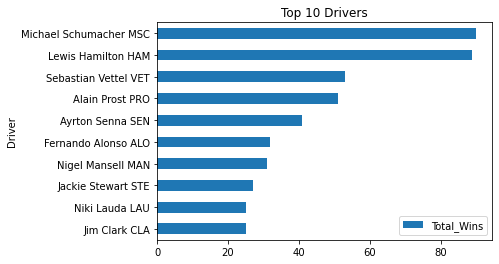

In [10]:
title = "Top 10 Drivers"
ylabel = "Number of Wins"
xlabel = "Driver"


top_10_drivers.plot.barh(title = title, ylabel = ylabel, xlabel = xlabel);
#plt.xticks(rotation=45, ha='right');

savename = "Top 10 Drivers.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Top 10 Drivers.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')



In [24]:
# Import CSV with results data

csv_file = "Resources/constructor_standings.csv"
constructor_standings_df = pd.read_csv(csv_file)
constructor_standings_df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [25]:
constructor_standings_df = constructor_standings_df.drop(["constructorStandingsId","position","positionText", "wins"], axis = 1)
constructor_standings_df

,raceId,constructorId,points
0,18,1,14.0
1,18,2,8.0
2,18,3,9.0
3,18,4,5.0
4,18,5,2.0
...,...,...,...
12736,1076,213,10.0
12737,1076,117,0.0
12738,1076,3,1.0
12739,1076,1,24.0


In [26]:
constructor_standings_df = constructor_standings_df.rename(columns={"raceId":"race_id", "constructorId":"constructor_id"})
constructor_standings_df

,race_id,constructor_id,points
0,18,1,14.0
1,18,2,8.0
2,18,3,9.0
3,18,4,5.0
4,18,5,2.0
...,...,...,...
12736,1076,213,10.0
12737,1076,117,0.0
12738,1076,3,1.0
12739,1076,1,24.0


In [28]:
#export results data
constructor_standings_df.to_sql(name='constructor_standings', con=engine, if_exists='append', index=False)

In [45]:
#Run SQL query to find total wins
driver_champs_df = pd.read_sql(
   "SELECT name, COUNT(name) FROM year_champs \
        GROUP BY name \
        ORDER BY count",
    engine
)
#Removed 1 point for Mclaren because of 2007 issue
driver_champs_df.iat[13,1] = 8
driver_champs_df


,name,count
0,BRM,1
1,Lotus-Ford,1
2,Brawn,1
3,Matra-Ford,1
4,Tyrrell,1
5,Benetton,1
6,Vanwall,1
7,Lotus-Climax,2
8,Renault,2
9,Cooper-Climax,2


In [46]:
# Getting first 3 rows from df
top_10_constructors = driver_champs_df.iloc[len(driver_champs_df)-10:]
#top_10_drivers['Total_Wins'] = top_10_drivers['Total_Wins'].astype(int)
top_10_constructors.set_index('name', inplace=True)
top_10_constructors

,count
name,
Lotus-Climax,2
Renault,2
Cooper-Climax,2
Brabham-Repco,2
Team Lotus,4
Red Bull,4
Mercedes,8
McLaren,9
Williams,9


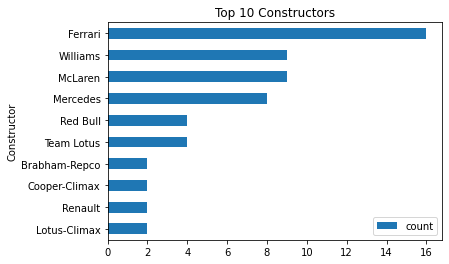

In [47]:
title = "Top 10 Constructors"
ylabel = "Number of Wins"
xlabel = "Constructor"


top_10_constructors.plot.barh(title = title, ylabel = ylabel, xlabel = xlabel);
#plt.xticks(rotation=45, ha='right');

savename = "Top10Constructors.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Top10Constructors.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')